In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from time import time

In [29]:
# !jupyter nbextension enable --py widgetsnbextension 
# !jupyter serverextension enable voila 

# Problem#1: Newman 10.8: Monte Carlo integration

Given integral is : 
$$I =\int_{0}^{1}\frac{x^{-1/2}}{e^x+1}dx$$

Equation 10.42 is:
$$I\simeq\frac{1}{N}\sum_{i=1}^N\frac{f(x_i)}{w(x_i)}\int_{a}^{b}w(x)dx$$

In the given problem; $a,b=0,1$

Also,
$$w(x)=x^{-1/2}$$

### Part(a)

Probability distribution is given equation 10.39;

$$p(x)=\frac{w(x)}{\int_{0}^{1}w(x)dx}$$

$$\int_{0}^{1}w(x)dx=\int_{0}^{1}x^{-1/2}dx=2x^{1/2}\biggr|_0^1=2$$

Therefore, $$p(x)=\frac{x^{-1/2}}{2}=\frac{1}{2\sqrt{x}}$$

$\textbf{Transformation method:}$

Consider random numbers z, with probability distribution q(z). Following from notes:

$$\int_{-\infty}^{x(z)}p(x')dx'=\int_0^zdz'$$

$$\int_0^{x(z)}\frac{1}{2\sqrt{x'}}dx'=z$$

$$\sqrt x\biggr|_0^{x(z)}=z$$

$$\sqrt x(z)=z$$

$$\boxed{x(z)=z^2}$$



### Part (b)

$\textbf{Question:}$ Using your formula, sample $N = 1000000$ random numbers and show that they have the desired distribution $p(x)$, and that the numbers directly from random have a uniform distribution.

$\textbf{Solution:}$

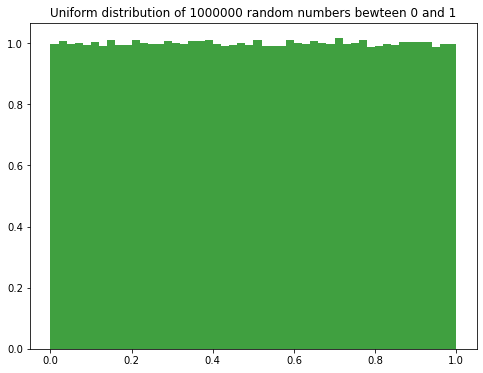

In [3]:
def p(x):
    return 0.5/np.sqrt(x)
N=1000000

### plotting uniform distribution
plt.figure(figsize=(8,6))
zz=np.random.uniform(0,1,N)
plt.hist(zz, 50, density=True, facecolor='g', alpha=0.75)
plt.title('Uniform distribution of 1000000 random numbers bewteen 0 and 1');

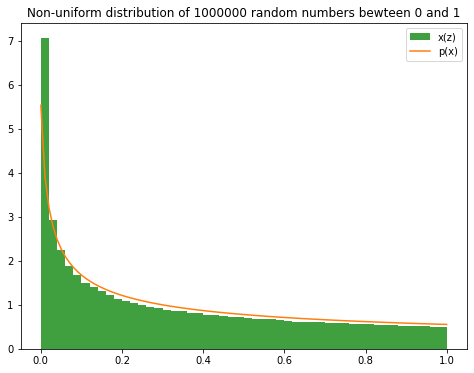

In [4]:
### Now plotting non-uniform distribution using transformation method x(z)=z^2 derived above
### Also, showing that they have the desired distribution p(x)
def x(z):
    return z**2
Z=x(zz)     ### Z is now my non-uniformily distributed points with probability density p(x)
plt.figure(figsize=(8,6))
plt.hist(Z, 50, density=True, facecolor='g', alpha=0.75,label='x(z)')
plt.plot(np.linspace(0,1,100),p(np.linspace(10,1000,100))*35,label='p(x)') #shited; p(x)*35 to show on same plot
plt.title('Non-uniform distribution of 1000000 random numbers bewteen 0 and 1')
plt.legend();

### Part(c)

$\textbf{Question:}$ Now, evaluate the integral using $N = 1 000 000$ random points. You should get a value around $0.84$

$\textbf{Solution:}$

In [5]:
### defining integrand f(x) and weight function w(x):

def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

def w(x):
    return 1/np.sqrt(x)

## Now using eq 10.42 to evaluate integral I

I=1/N*(np.sum(f(Z)/w(Z)))*2    ### 2 is value of integral w(x)dx from 0 to 1

print('Value of given integral I using Monte-carlo method is ',I)

Value of given integral I using Monte-carlo method is  0.8389490995947418


### Part(d)
$\textbf{Question:}$ Repeat 9 more times, for a total of ten tries, to get an idea of the variability of your estimate of the integral. How many significant figures do you think you have in the value of the integral?

$\textbf{Solution:}$

In [6]:
### Printing the value of integral for 9 consecutive tries

for i in range(9):
    zz=np.random.uniform(0,1,N)
    Integral = 1/N*(np.sum(f(x(zz))/w(x(zz))))*2
    print('On try no.',i+1,'value of integral, I =',Integral)

On try no. 1 value of integral, I = 0.8389964774666071
On try no. 2 value of integral, I = 0.8391746195027396
On try no. 3 value of integral, I = 0.8388592463479339
On try no. 4 value of integral, I = 0.8391087488485849
On try no. 5 value of integral, I = 0.839102108674708
On try no. 6 value of integral, I = 0.8386859305825484
On try no. 7 value of integral, I = 0.838899521736452
On try no. 8 value of integral, I = 0.8389322300953433
On try no. 9 value of integral, I = 0.8388888001409726


In my calculation first three digits after point are significant enough to determine value of integral approx. equal to 0.84. As the real value is around $84.0\times10^{-2}$. I can write my answer as $83.8\times10^{-2}$

### Part(e)
$\textbf{Question:}$ Why is Monte Carlo integration and importance sampling useful in this problem as compared to conventional methods like the trapezoidal rule or Simpson’s rule?

$\textbf{Answer:}$ Integrand value vary near 0 with a steep slope and then it asymptotes to zero, with trapezoidal rule, and simpson rule limit a=0 can not be include as f(x) diverge at 0. Importance sampling takes care of this divergence by itself. Let's see why.

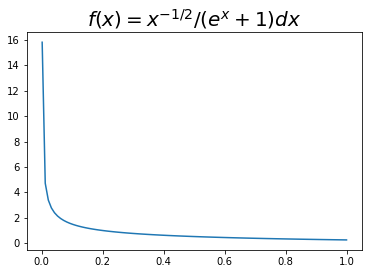

In [7]:
## Integrand looks like this
plt.plot(np.linspace(0.001,1,100),f(np.linspace(0.001,1,100)))  ### can not include 0 in function
plt.title('$f(x)=x^{-1/2}/(e^x+1)dx$',fontsize=20);


However, by looking at the graph one can try wisely by dicsrading points near zero as the area under those points is minimum.

In [8]:
def trapezoidal(N,a,b):
    h,k=(b-a)/N,np.arange(1,N,1)
    return h*(0.5*f(a)+0.5*f(b)+np.sum(f(a+k*h)))
trapezoidal(N=1000,a=0.0001,b=1),trapezoidal(N=1000,a=0.001,b=1),trapezoidal(N=1000,a=0.00001,b=1)

(0.8388513864722054, 0.8079414005024779, 0.8946945352326564)

But without knowing the value of integral, slight difference in the lower limit of integration i.e. a gives completely different results. So there is point of randomly calculating the value of integral when the method of importance sampling gaurantees to converge at approx. real answer.

# Problem#2: Principal component analysis on Ising model data


### Part(a)

Construct the data matrix; each row contains separate measurement

Mean center each column of data matrix

Calculate the covariance matrix from the data matrix

Calculate the eigenvectors and eigenvalues of the covariance matrix

Sort the eigenvectors by the largest eigenvalue


In [9]:
import pickle,os
from numpy import unpackbits
TT="2.00"
Ngrid = 40*40
data = pickle.load(open('Ising2DFM_reSample_L40_T='+TT+'.pkl','rb'))
array = unpackbits(data).astype(int).reshape(-1,Ngrid)

### Part(b)

In [10]:
Sample_size=array[:625]   ### using first 625 samples, it is easier to convert 625 into square matrix

### Part(c)

In [11]:
## Now as we have just two features for each data point which is either +1 or -1 so our vector x is 
#Calulating mean first
Mean=np.mean(Sample_size)
### Subtrating from all points
xx=Sample_size-Mean
### calculating mean of xx to make sure if it is zero
print(np.mean(xx))

4.439471013029106e-17


mean is nearly zero now

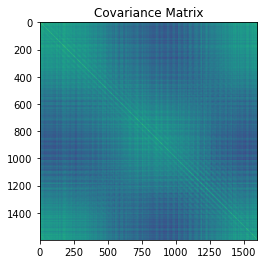

In [12]:
Sigma_matrix=xx.T@xx/(624)  ### covariance matrix
plt.imshow(Sigma_matrix)
plt.title('Covariance Matrix');

In [13]:
E_value,E_vectors_t=np.linalg.eig(Sigma_matrix)
E_vectors=E_vectors_t.T

Question: Are you able to use the Hermitian routines for this?

Answer: I was able to use hermitian routines but the Log of explained variance started giving warning of nan. When I used eig instead of eigh and took log of absoule Explained variance, there is no warning of nan.

### Part(d)

The explained variance is given from eigenvalues $λ_i$ as $\lambda_i/\sum_{j=1}^p \lambda_j$

In [14]:
Exp_var=np.empty(len(E_value))
Sum_E_values=np.sum(E_value.real)
for i,j in enumerate(E_value.real):
    Exp_var[i]=j/Sum_E_values

In [15]:
Log_Exp_var=np.log(np.sort(abs(Exp_var)))

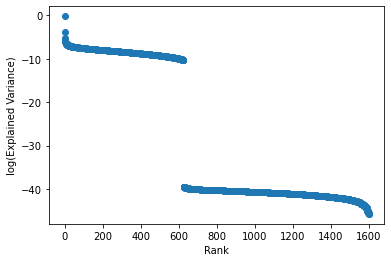

In [16]:
plt.scatter(np.linspace(0,1600,1600),np.flip(Log_Exp_var))
plt.xlabel('Rank')
plt.ylabel('log(Explained Variance)');

### Part(e)

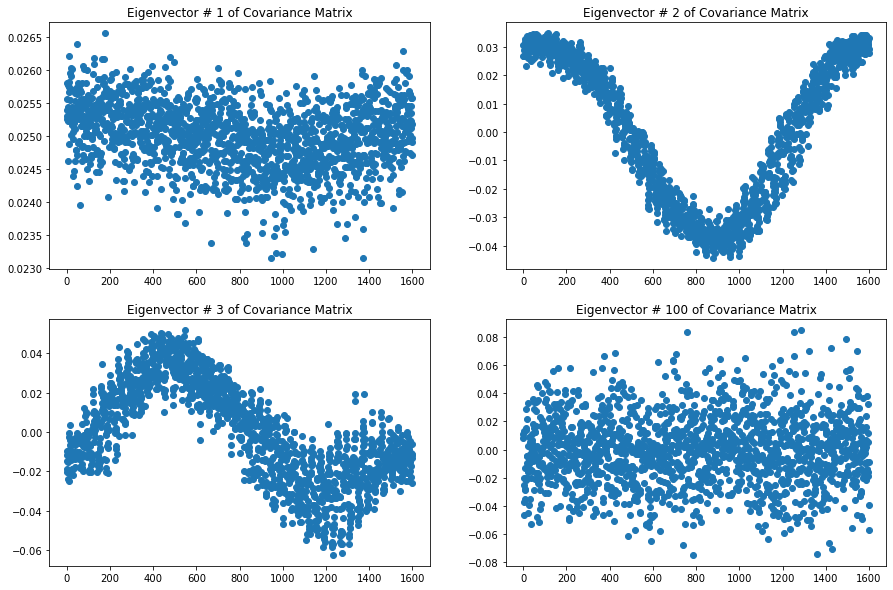

In [17]:
### Plotting Sactter plot of Eigenvectors of Covariance matrix (PC-Eigenvectors)
plt.figure(figsize=(15,10))
n=[0,1,2,99]
for i,j in enumerate(n):
    plt.subplot(2,2,i+1)
    plt.scatter(np.linspace(0,1600,1600),E_vectors[j].real)
    plt.title('Eigenvector # '+str(j+1)+ ' of Covariance Matrix')
plt.show()

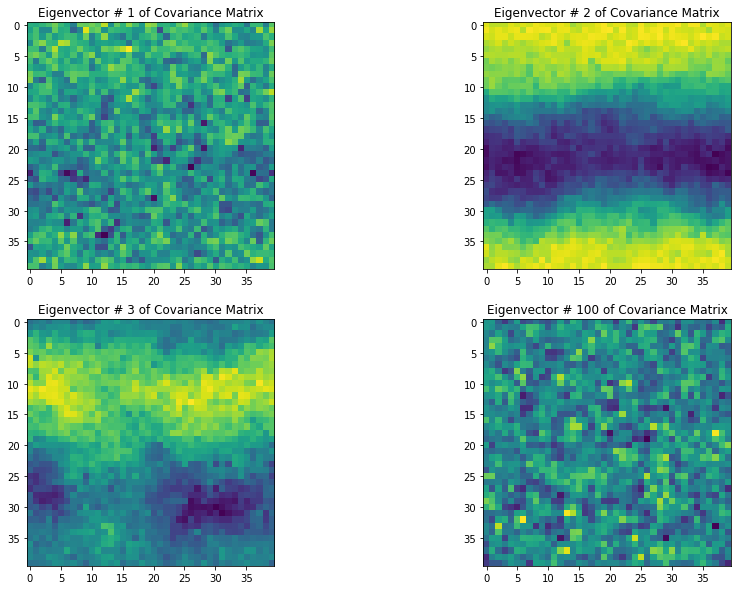

In [18]:
### Plotting Sactter plot of Eigenvectors of Covariance matrix (PC-Eigenvectors)
plt.figure(figsize=(15,10))
n=[0,1,2,99]
for i,j in enumerate(n):
    plt.subplot(2,2,i+1)
    plt.imshow(E_vectors[j].real.reshape(40,40))
    plt.title('Eigenvector # '+str(j+1)+ ' of Covariance Matrix')
plt.show()

### 1st principal component analysis, PCA-1

In [19]:
Data=array-np.mean(array)

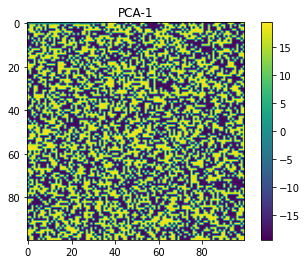

In [20]:
PCA_1=Data@E_vectors[0]
PCA_1.shape
plt.imshow(PCA_1.real.reshape(100,100))
plt.title('PCA-1')
plt.colorbar();

### 2nd principal component analysis, PCA-2

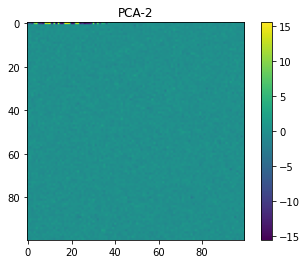

In [21]:
PCA_2=Data@E_vectors[1]
plt.imshow(PCA_2.real.reshape(100,100))
plt.title('PCA-2')
plt.colorbar();

### 3rd principal component analysis, PCA-3

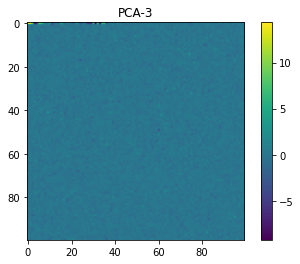

In [22]:
PCA_3=Data@E_vectors[2]
plt.imshow(PCA_3.real.reshape(100,100))
plt.title('PCA-3')
plt.colorbar();

### 100th principal component analysis, PCA-100

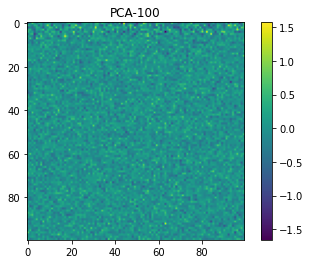

In [23]:
PCA_100=Data@E_vectors[99]
plt.imshow(PCA_100.real.reshape(100,100))
plt.title('PCA-100')
plt.colorbar();

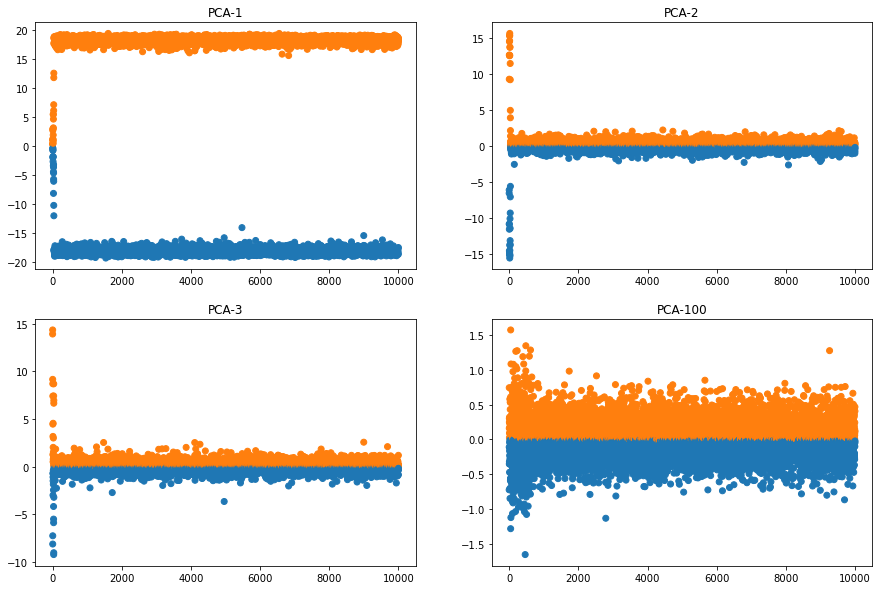

In [24]:
### Plotting Scatter plot of PCA 
plt.figure(figsize=(15,10))
PCAs=[PCA_1,PCA_2,PCA_3,PCA_100]
for i,j in enumerate(PCAs):
    plt.subplot(2,2,i+1)
    colors = np.where(j.real<0, 'C0', 'C1')
    plt.scatter(np.linspace(0,10000,10000),j.real,c=colors.ravel())
    if i==3:
        i=99
    plt.title('PCA-'+str(i+1))
plt.show()

### Comment:
Ising model has two possible spin for each site, here PCA-2 seems like separated two spins as up and down. Half ot the sites are positive and half are negative.

### Using our training data to test on given sample

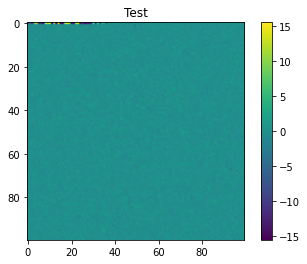

In [25]:
Test=Data@E_vectors[1]
plt.imshow(Test.real.reshape(100,100))
plt.title('Test')
plt.colorbar();

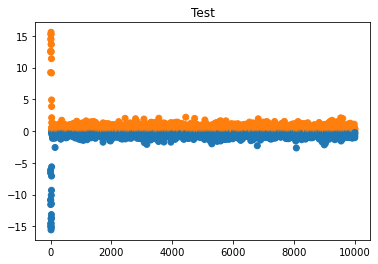

In [26]:
colors = np.where(Test.real<0, 'C0', 'C1')
plt.scatter(np.linspace(0,10000,10000),Test.real,c=colors.ravel())
plt.title('Test');

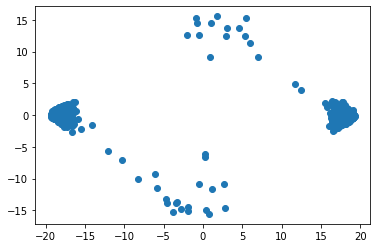

In [27]:
plt.scatter(PCA_1.real,PCA_2.real);

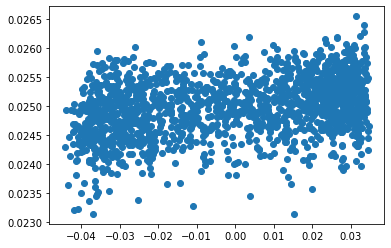

In [28]:
plt.scatter(E_vectors[1].real,E_vectors[0].real);